In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [88]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_gender_submission = pd.read_csv('gender_submission.csv')

data_train.shape

(891, 12)

In [89]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [90]:
data_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

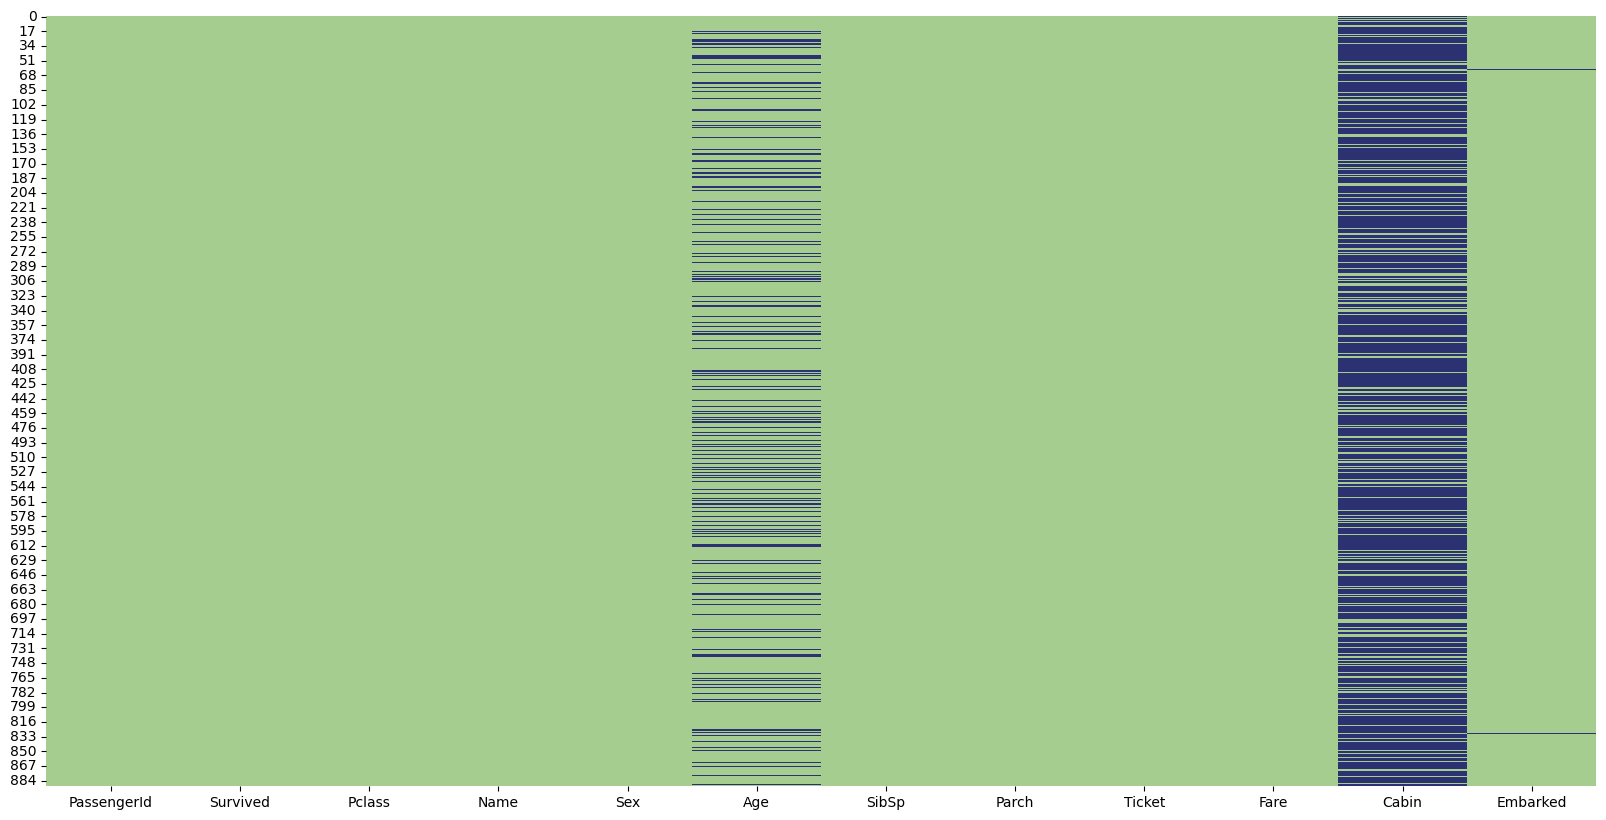

In [93]:
plt.figure(figsize=(20,10))
sns.heatmap(data_train.isna(),cmap="crest", cbar=False);

In [94]:
data_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [95]:
data_train.duplicated().sum()

0

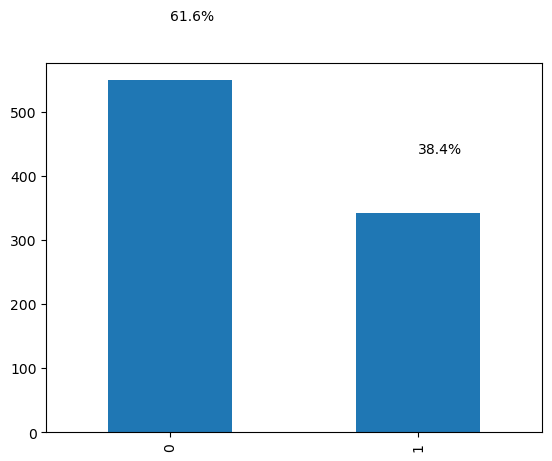

In [96]:
# Nombre de valeurs
values_count = data_train['Survived'].value_counts()

# Nombre total de valeurs
sum_count = data_train.shape[0]

#Plotting
data_train['Survived'].value_counts().plot(kind='bar');

# Cette loupe ajoute le pourcentage correspondant à chaque barre
for i in range(values_count.shape[0]):
    count = values_count[i]
    percent_str = '{:.1f}%'.format(100*count/sum_count)
    plt.text(i, count+100, percent_str, va='center')

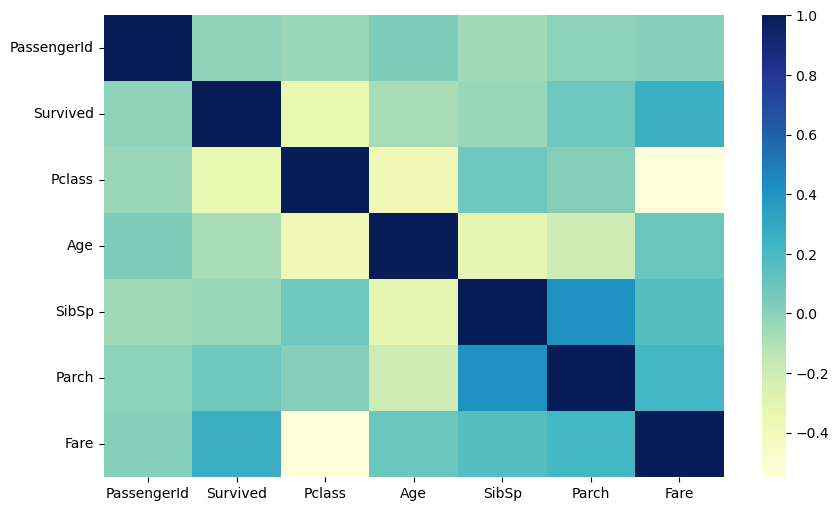

In [97]:
plt.figure(figsize=(10,6))
sns.heatmap(data_train.corr(), cmap="YlGnBu");

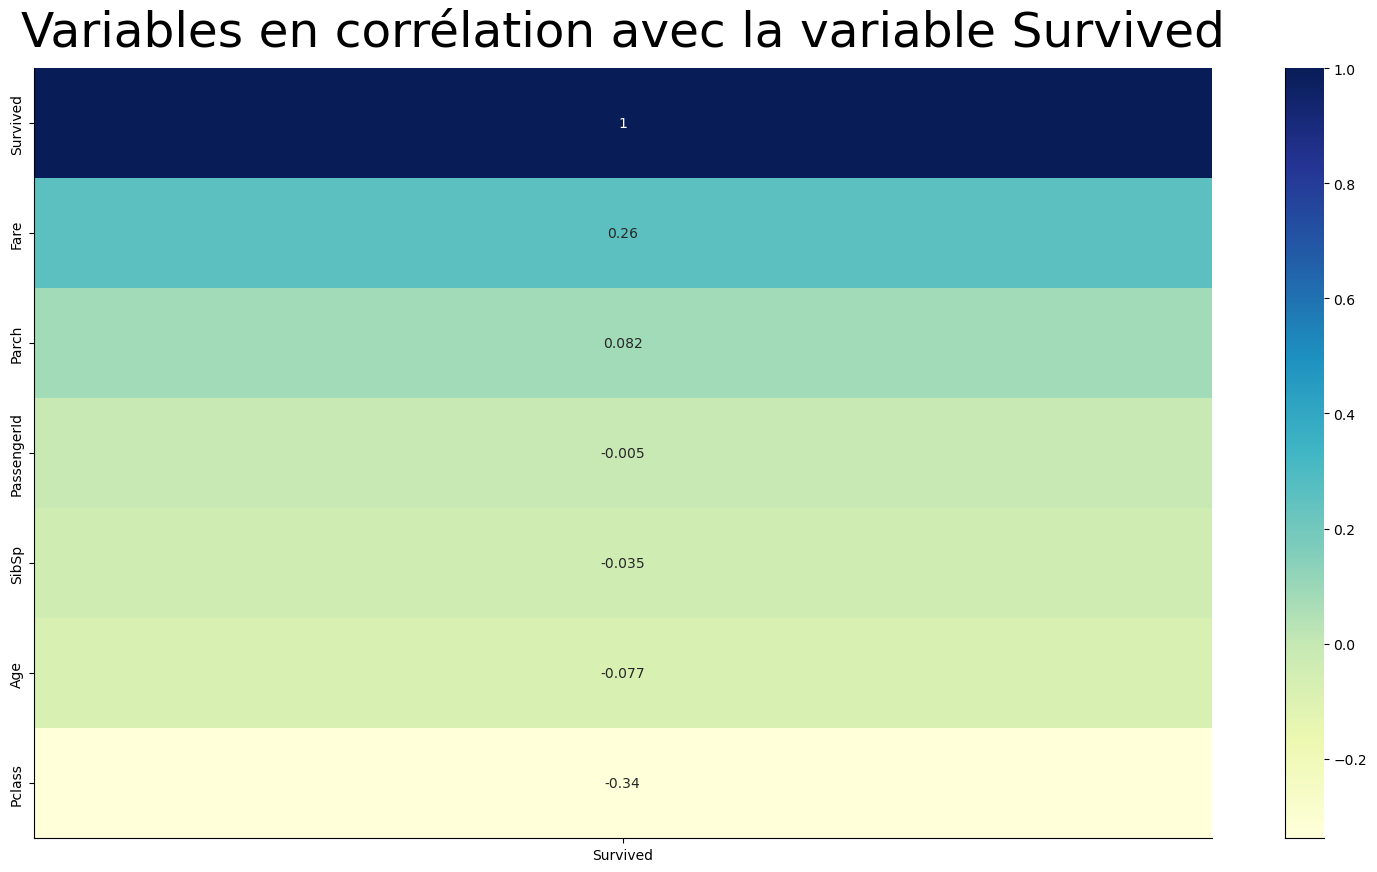

In [98]:
plt.figure(figsize=(19,10))
heatmap = sns.heatmap(data_train.corr()[['Survived']].sort_values(by='Survived', ascending=False), annot=True, cmap='YlGnBu')
heatmap.set_title('Variables en corrélation avec la variable Survived', fontdict={'fontsize':35}, pad=16);
sns.despine()
plt.show()

In [99]:
data_train.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)

In [100]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Gérons les valeurs manquantes

In [101]:
data_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [102]:
data_train.Age.mean()

29.69911764705882

In [103]:
data_train['Age']=data_train['Age'].fillna(29)

In [104]:
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [105]:
data_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [106]:
data_train[data_train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [107]:
data_train.groupby(by=['Pclass','Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [108]:
data_train['Embarked'] = data_train['Embarked'].fillna('C')

In [109]:
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

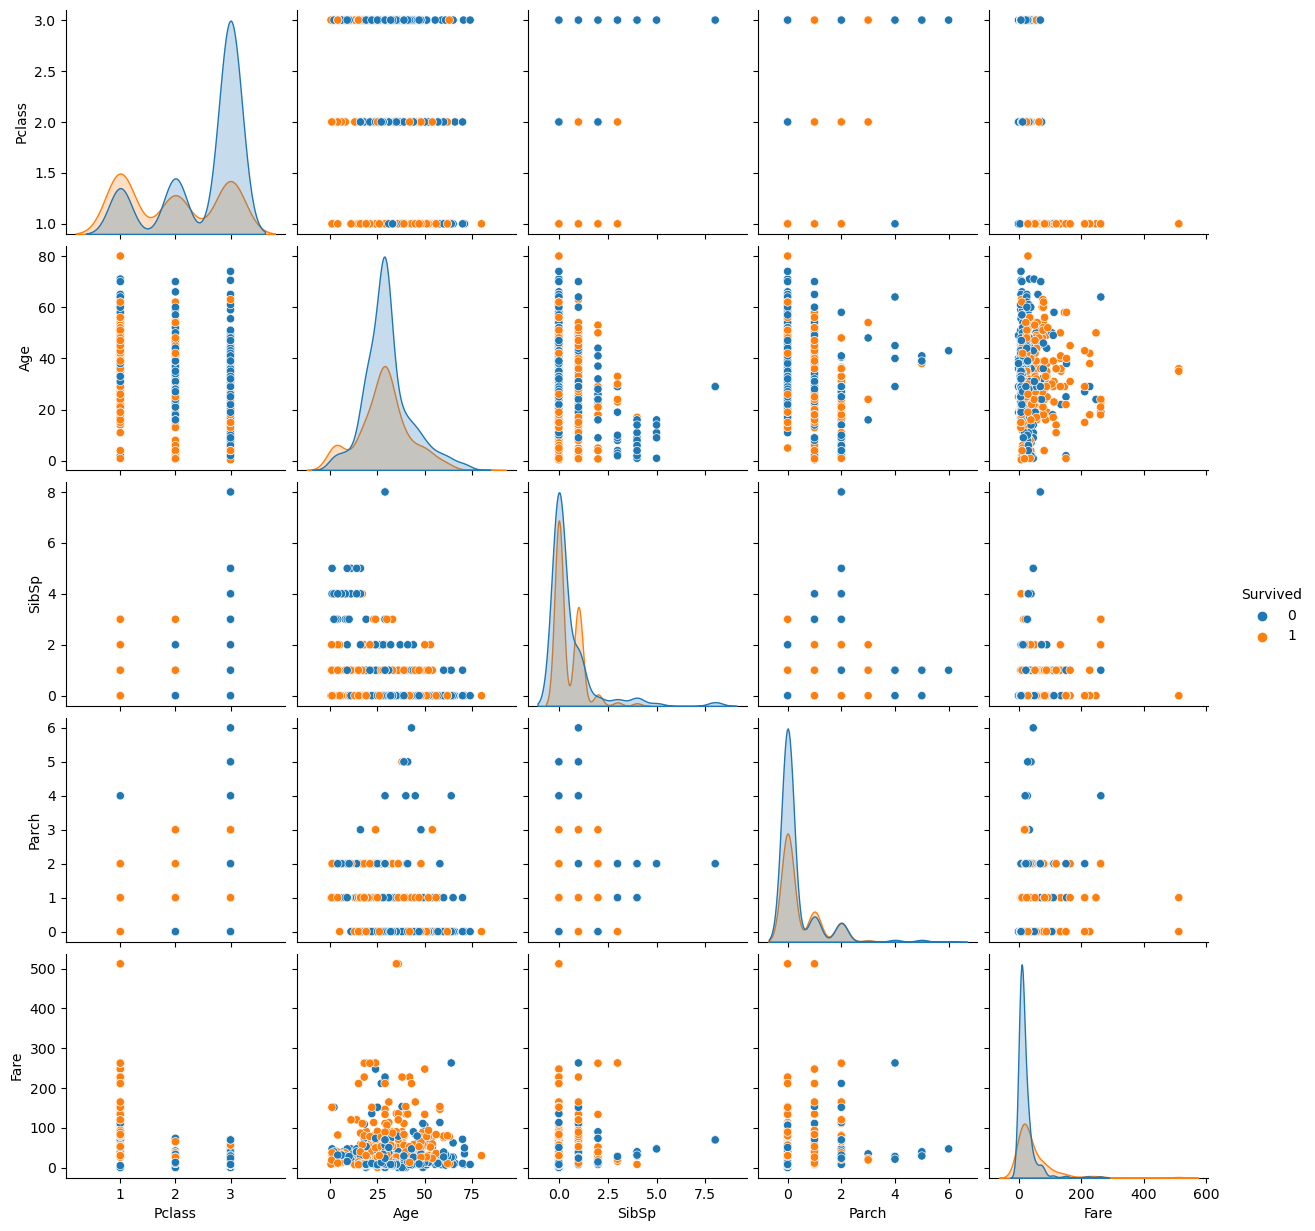

In [110]:
sns.pairplot(data_train,hue='Survived')

/Users/Theboybat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


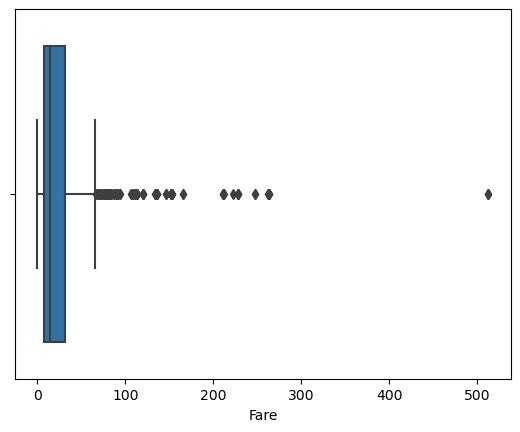

In [111]:
sns.boxplot(data_train['Fare'])
plt.show();

In [112]:
df_train = data_train.copy()
df_train2 = data_train.copy()

In [113]:
df_train2[(df_train2['Pclass']==1)&(df_train2['Embarked']=='C')]['Fare'].median()

79.2

In [115]:
df_train2.drop(index=df_train2[df_train2['Fare']>500].index,inplace=True)

In [116]:
df_train2.drop(index=df_train2[df_train2['Fare']>250].index,inplace=True)

In [40]:
def outlier(df):
    list_outlier_col = ['Fare'] #colonnes concernées
    for i in list_outlier_col :
        #limite superieure
        upper_limit = df[i].quantile(0.95)
        #limite inferieure
        lower_limit = df[i].quantile(0.05)
        df[i] = df[i].clip(lower = lower_limit, upper =  upper_limit)
    return df

In [60]:
df_train1 = outlier(df_train1)

In [41]:
df_train = outlier(df_train)

/Users/Theboybat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


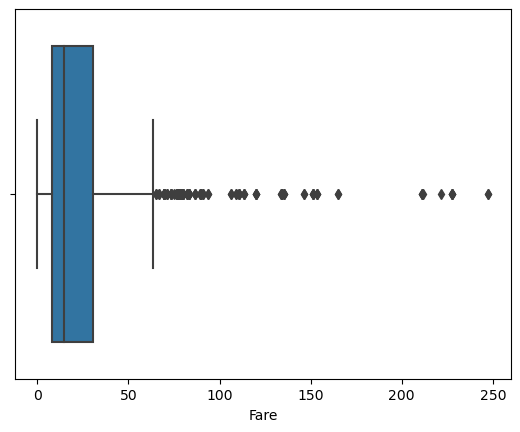

In [117]:
sns.boxplot(df_train2['Fare'])
plt.show();

In [118]:
#Encodage de la variable sex

la = LabelEncoder()
df_train2['Sex'] = la.fit_transform(df_train2['Sex'])

In [119]:
# Encodage de la variable Embarked

df_train2 = pd.get_dummies(df_train2,columns=['Embarked'], drop_first=True)

In [120]:
df_train2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,29.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [121]:
#minmax

Ma = MinMaxScaler()
df_train2['Age'] = Ma.fit_transform(df_train2['Age'].values.reshape(-1,1))
df_train2['Fare'] = Ma.fit_transform(df_train2['Fare'].values.reshape(-1,1))

In [122]:
df_train2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,0.271174,1,0,0.029290,0,1
1,1,1,0,0.472229,1,0,0.287989,0,0
2,1,3,0,0.321438,0,0,0.032018,0,1
3,1,1,0,0.434531,1,0,0.214527,0,1
4,0,3,1,0.434531,0,0,0.032523,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.052521,0,1
887,1,1,0,0.233476,0,0,0.121202,0,1
888,0,3,0,0.359135,1,2,0.094740,0,1
889,1,1,1,0.321438,0,0,0.121202,0,0


In [123]:
X = df_train2.drop('Survived',axis='columns')
y = df_train2['Survived']

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [125]:
model = SVC(max_iter=1000)

In [126]:
model.fit(X_train,y_train)

SVC(max_iter=1000)

In [127]:
y_pred = model.predict(X_test)

In [128]:
accuracy_score(y_test,y_pred)

0.8418079096045198

## Vérification sur les données de test

In [130]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [131]:
data_test.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)

In [132]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [133]:
data_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [136]:
data_test['Age'].mean()

30.272590361445783

In [137]:
data_test['Age']=data_test['Age'].fillna(29)

In [138]:
data_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [140]:
data_test['Fare'] = data_test['Fare'].fillna(8.05)

In [141]:
data_test['Sex'] = la.fit_transform(data_test['Sex'])
data_test = pd.get_dummies(data_test,columns=['Embarked'],drop_first=True)

In [142]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,1,29.0,0,0,8.0500,0,1
414,1,0,39.0,0,0,108.9000,0,0
415,3,1,38.5,0,0,7.2500,0,1
416,3,1,29.0,0,0,8.0500,0,1


In [143]:
Ma = MinMaxScaler()
data_test['Age'] = Ma.fit_transform(data_test['Age'].values.reshape(-1,1))
data_test['Fare'] = Ma.fit_transform(data_test['Fare'].values.reshape(-1,1))

In [144]:
X_test_pred = model.predict(data_test)

In [145]:
X_test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [146]:
data_gender_submission 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [147]:
data_gender_submission['Pred_Value'] = X_test_pred

In [148]:
data_gender_submission

,PassengerId,Survived,Pred_Value
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [149]:
accuracy_score(data_gender_submission['Survived'],data_gender_submission['Pred_Value'])

0.9832535885167464

### On obtient donc un score de 98% de prediction